# UE10 - Extraction

- Khang Duy LAI
- Mazen TEBIB

## Import important libraries

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

1) cleaning text
2) choosing model
3) features extraction
4) confusion matrix for grps 
5) run model through groups (cascade thingy)

In [3]:
# metrics to check : 
# 1)taux d'erreur
# 2)Precision **** to maximise
# 3)Rappel **** also to maximise ensemble
# 4)ROC : well we create one to maximise precision then one model to maximise rappelnd see which one perfoms better on both metrics(ROC)
# 5)moyenne harmonique de P et R (F-meùsure): 
# rapport : basically talk abt ur experiments, what did u want to try, el hypothese that we had to go after this,
#           how, analyze ur work and results u have 
#           (like saying ah we tried *this* ama we find out that our F1 score worse by this margin or better)
#           rendu : pdf rapport, zip for code

In [4]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not #actually cannot 

In [5]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka 
# #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not 
# #actually cannot 

Read in the dataset

In [6]:
df = pd.read_fwf('./train.txt', colspecs=[(1,4),(6, None)], header=None)
df.columns = ['country','description']

In [7]:
df.head()

,country,description
0,GER,IThe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your..."
2,CHI,Some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...


Encode the label

In [8]:
le = preprocessing.LabelEncoder()
df['y_country'] = le.fit_transform(df.country)

In [9]:
import nltk
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [10]:
from nltk.corpus import cmudict
from nltk.tokenize import word_tokenize, sent_tokenize
import string


def clean_review(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    
    return " ".join(cleaned_text)

### - **Extracting Structural/lexical features**
we thought about adding features that represents the writing style  
  lexical,syntactic, structural  
  *-lexical :*  
  total number of words  
  total number of characters  
  total number of alphabetic characters  
  total number of upper-case characters  
  total number of syllables  
  average word length  
  average sentence length by characters  
  average sentence length by words   
  ratio of unique words  
*-syntactic:*  
  frequency of special characters  
  frequency of punctuations  
  frequency of functional words  
  part of speech tags  
*-structural :*  
	number of sentences  


In [11]:
#count number of sequences
def nb_seq(text):
    tokens = sent_tokenize(text)
    return (len(tokens))
df['nb_seq'] = df['description'].apply(lambda x: nb_seq(x))

In [12]:
#count number of words
def nb_words(text):
    text = word_tokenize(text)
    st = string.punctuation
    words = [word for word in text if word not in st]
    return len(words)
df['nb_words'] = df['description'].apply(lambda x: nb_words(x))

In [13]:
#total number of characters 
def len_text(text):
    return len(text)
df['len_text'] = df['description'].apply(lambda x: len_text(x))

In [14]:
#count number of alphabetique characters
def nb_alpha(text):
    return sum(1 for i in text if i.isalpha())
df['nb_alpha'] = df['description'].apply(lambda x: nb_alpha(x))

In [15]:
#count of uppercase characters
def nb_upcase(text):
    return sum(1 for i in text if i.isupper())
df['nb_uppercase'] = df['description'].apply(lambda x: nb_upcase(x))

In [16]:
def syllable_count_Manual(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("e"):
                count -= 1
    if count == 0:
        count += 1
    return count
def syllable_count(word):
    global cmuDictionary
    d = cmuDictionary
    try:
        syl = [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except:
        syl = syllable_count_Manual(word)
    return syl

In [17]:
#count syllables
global cmuDictionary
cmuDictionary = cmudict.dict()
df['nb_syllable'] = df['description'].apply(lambda x: syllable_count(x))

In [18]:
#count avg word length
from nltk.corpus import stopwords
def mean_word_length(word):
    punc = list(string.punctuation)
    tokens = word_tokenize(word, language='english')
    stop = stopwords.words('english') + punc 
    words = [word for word in tokens if word not in stop]
    return np.average([len(word) for word in words])
df['mean_word_length'] = df['description'].apply(lambda x: mean_word_length(x))

In [19]:
#Average Sentence Length By Character
def mean_sentence_length(text):
    tokens = sent_tokenize(text)
    return np.average([len(token) for token in tokens])
df['mean_sentence_length'] = df['description'].apply(lambda x: mean_sentence_length(x))

In [20]:
#Average sentence length by words
def mean_sentence_length_byWords(text):
    tokens = sent_tokenize(text)
    return np.average([len(token.split()) for token in tokens])
df['mean_sentence_length_byWords'] = df['description'].apply(lambda x: mean_sentence_length_byWords(x))

In [21]:
def tot_diff_words(text):
    words = word_tokenize(text)
    return len(set(words)) / len(words)
df['tot_diff_words'] = df['description'].apply(lambda x: tot_diff_words(x))

In [22]:
#frequency of special character in a text
def freq_special_character(text):
    sc = string.punctuation
    count = 0
    for i in text:
        if (i in sc):
            count = count + 1
    return float(count) / float(len(text))

In [23]:
#frequency of punctuations in a text
def freq_punc(text):
    punc = [",", ".", "'", "!", '"', ";", "?", ":", ";"]
    count = 0
    for i in text:
        if (i in punc):
            count = count + 1
    return float(count) / float(len(text))

In [24]:
#removes punctuation and special characters that are in string.punctuation
def remove_punctuation(text):
    text = word_tokenize(text)
    st = string.punctuation
    words = [word for word in text if word not in st]
    return words

In [25]:
#count frequency of functional words in a text
def frequency_functional_words(text):
    functional_words = """a between in nor some upon about both including nothing somebody us above but inside of someone used after by into off something via all can is on such we although cos it once than what am do its one that whatever among down latter onto the when an each less opposite their where and either like or them whether another enough little our these which any every lots outside they while anybody everybody many over this who anyone everyone me own those whoever anything everything more past though whom are few most per through whose around following much plenty till will as for must plus to with at from my regarding toward within be have near same towards without because he need several under worth before her neither she unless would behind him no should unlike yes below i nobody since until you beside if none so up your"""
    functional_words = functional_words.split()
    words = remove_punctuation(text)
    count = 0

    for i in text:
        if i in functional_words:
            count += 1
    return count / len(words)
df['frequency_functional_words'] = df['description'].apply(lambda x: frequency_functional_words(x))

In [26]:
df['cleaned_description'] = df['description'].apply(lambda x: clean_review(x))

In [27]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
def pos_tags_distribution(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for word, tag in pos_tags)
    return pos_counts
pos_tags_df =[]
pos_tags_df = df['cleaned_description'].apply(pos_tags_distribution).apply(pd.Series).fillna(0)
pos_tags_df.columns = [f'pos_{col}' for col in pos_tags_df.columns]

df = pd.concat([df, pos_tags_df], axis=1)

In [29]:
df.columns

Index(['country', 'description', 'y_country', 'nb_seq', 'nb_words', 'len_text',
       'nb_alpha', 'nb_uppercase', 'nb_syllable', 'mean_word_length',
       'mean_sentence_length', 'mean_sentence_length_byWords',
       'tot_diff_words', 'frequency_functional_words', 'cleaned_description',
       'pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', 'pos_''', 'pos_SYM'],
      dtype='object')

In [30]:
X = df['cleaned_description'].values.tolist() 
Y = df['y_country'].values.tolist()

# - choosing best classifier for our case

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [32]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [34]:
names = [
    "Nearest Neighbors",
    "Linear SVC",
    "Random Forest",
    "Kmeans",
    "GaussianNB"
]
classifiers = [
    KNeighborsClassifier(n_neighbors=10),
    LinearSVC(max_iter=1000),
    RandomForestClassifier(max_depth=10),
    KMeans(n_clusters=11, random_state=0),
]

In [38]:
#1st confusion matrix 
def model(X ,Y, clf, add_features):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)

    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain_description = tf.fit_transform(X_train['cleaned_description'])
    tf_Xtest_description = tf.transform(X_test['cleaned_description'])
    #would be better if u split data before then fit then transform  
    if add_features:
        X_train = X_train[add_features]
        X_test = X_test[add_features]

        X_train = X_train.fillna(0)
        X_test = X_test.fillna(0)
        
        scaler = StandardScaler()   
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)

        X_train_sparse = csr_matrix(X_train_scaled)
        X_test_sparse = csr_matrix(X_test_scaled)


        tf_Xtrain = hstack((tf_Xtrain_description, X_train_sparse))
        tf_Xtest = hstack((tf_Xtest_description, X_test_sparse))
    else:
        tf_Xtrain = tf_Xtrain_description
        tf_Xtest = tf_Xtest_description
        
    # skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # cv_results = cross_val_score(clf, tf_Xtrain, y_train, cv=skf, scoring='f1_micro', n_jobs = -1)

    clf = clf.fit(tf_Xtrain, y_train)
    
    # print(cv_results, cv_results.mean())    
    y_pred = clf.predict(tf_Xtest)
    acc = accuracy_score(y_test,y_pred)
    print("accuracy", acc)
    
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)
    
    """labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)"""
    return acc

In [36]:
cf_dfn=[]

In [37]:
import lightgbm as lgb
lgbm_clf = lgb

In [49]:
params = {
    'objective': 'multiclass',
    'num_class': len(df['y_country'].unique()),
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'learning_rate': 0.03,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 1,
}

In [51]:
cf = compare_models(X,Y, lgb,params,add_features=['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words','frequency_functional_words','pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', "pos_''", 'pos_SYM'])

(8800, 656095)
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.256239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258717
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 7794
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895


c:\Users\mazen\Anaconda3\lib\site-packages\lightgbm\basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


accuracy 0.5309090909090909


**we tried using lightgmb since it’s known for being fast and reliable however we got an accuracy of 0.53**

In [33]:
for name, clf in zip(names,classifiers):
  print("for classifier :", name)
  cf_df = models(X,Y,clf)

for classifier : Nearest Neighbors
accuracy 0.22363636363636363
for classifier : Linear SVC
accuracy 0.7036363636363636
for classifier : Random Forest
accuracy 0.19545454545454546
for classifier : Kmeans


KeyboardInterrupt: 

In [37]:
#we choose linearSVC

### - Confusion matrix 

In [38]:
cf_df = model(X,Y, LinearSVC(max_iter=1000))
cf_df1 = model(X,Y, LinearSVC(max_iter=1000))
cf_df2 = model(X,Y, LinearSVC(max_iter=1000))
cf_df3 = model(X,Y, LinearSVC(max_iter=1000))

accuracy 0.6945454545454546
accuracy 0.6818181818181818
accuracy 0.6981818181818182
accuracy 0.7063636363636364


In [39]:
cf_sum = cf_df + cf_df1 + cf_df2 + cf_df3

<AxesSubplot:>

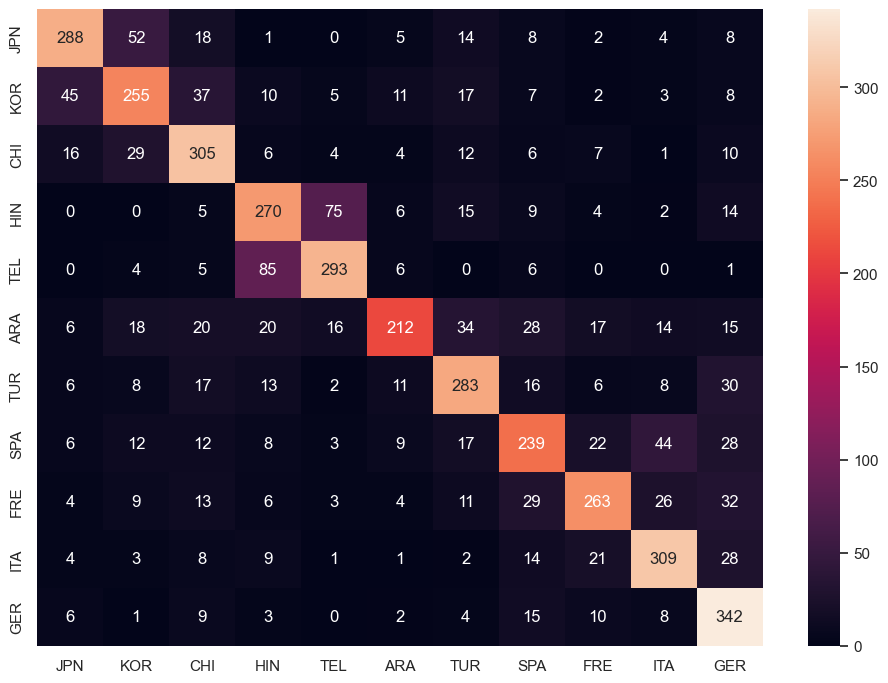

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(cf_sum, annot=True, fmt='g')

* **after finding best model and groups(by countries) now we try to extract different features and redo the classification**

In [48]:
df.columns

Index(['country', 'description', 'y_country', 'nb_seq', 'nb_words', 'len_text',
       'nb_alpha', 'nb_uppercase', 'nb_syllable', 'mean_word_length',
       'mean_sentence_length', 'mean_sentence_length_byWords',
       'tot_diff_words', 'frequency_functional_words', 'cleaned_description',
       'pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', 'pos_''', 'pos_SYM'],
      dtype='object')

In [69]:
Y = df['y_country']

In [51]:
X.head(1)

,cleaned_description,nb_seq,nb_words,len_text,nb_alpha,nb_uppercase,nb_syllable,mean_word_length,mean_sentence_length,mean_sentence_length_byWords,...,pos_PDT,pos_FW,pos_UH,pos_WP$,pos_NNP,pos_NNPS,pos_POS,pos_$,pos_'',pos_SYM
0,ithe importance and popularity of travelling i...,13,321,1649,1293,16,468,5.611511,125.923077,26.076923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X.shape

(9900, 49)

In [53]:
Y.shape

(9900,)

In [39]:
#1st confusion matrix 
def compare_models(X ,Y, clf, params, add_features):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)

    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain_description = tf.fit_transform(X_train['cleaned_description'])
    tf_Xtest_description = tf.transform(X_test['cleaned_description'])
    #would be better if u split data before then fit then transform  
    if add_features:
        X_train = X_train[add_features]
        X_test = X_test[add_features]

        X_train = X_train.fillna(0)
        X_test = X_test.fillna(0)
        
        scaler = StandardScaler()   
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)

        X_train_sparse = csr_matrix(X_train_scaled)
        X_test_sparse = csr_matrix(X_test_scaled)


        tf_Xtrain = hstack((tf_Xtrain_description, X_train_sparse))
        tf_Xtest = hstack((tf_Xtest_description, X_test_sparse))
    else:
        tf_Xtrain = tf_Xtrain_description
        tf_Xtest = tf_Xtest_description
    print(tf_Xtrain.shape)
    d_train = lgb.Dataset(tf_Xtrain, label=y_train)
    clf = lgb.train(params, d_train)
        
    
    y_pred = clf.predict(tf_Xtest)
    y_val_pred = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test,y_val_pred)
    print("accuracy", acc)
    
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_val_pred)
    
    """labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)"""
    return acc

searching for best features for our model

In [ ]:
X = df[['cleaned_description','nb_seq', 'nb_words', 'len_text',
       'nb_alpha', 'nb_uppercase', 'nb_syllable', 'mean_word_length',
       'mean_sentence_length', 'mean_sentence_length_byWords',
       'tot_diff_words', 'frequency_functional_words','pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', "pos_''", 'pos_SYM']]

In [ ]:
import itertools
from tqdm import tqdm

In [ ]:
num_features = ['nb_seq', 'nb_words', 'len_text', 'nb_alpha', 'nb_uppercase', 'nb_syllable', 'mean_word_length', 'mean_sentence_length', 'mean_sentence_length_byWords', 'tot_diff_words', 'count_functional_words']

# Generate all possible combinations of numerical features
feature_combinations = []
for i in range(len(num_features) + 1):
    feature_combinations.extend(list(itertools.combinations(num_features, i)))

# Evaluate the model with each feature combination
### do not run, takes a long time to finish###
"""
results = []
for combination in tqdm(feature_combinations, desc="Processing feature combinations"):
    selected_features = list(combination)
    accuracy = compare_models(X, Y, LinearSVC(max_iter=1000), add_features=selected_features)
    results.append((accuracy, selected_features))
results = pd.DataFrame(results)
"""

In [ ]:
best_comb = (results[results[0] == results[0].max()])

In [ ]:
best_comb

,0,1
1057,0.743636,"[nb_seq, nb_words, len_text, nb_uppercase, mea..."


In [ ]:
print(best_comb[1].tolist())

[['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words']]


best combination of features found to be [['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words']]

### Hyper-parameters 

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'dual': [False],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}

In [43]:
grid_search = GridSearchCV(
    LinearSVC(),
    param_grid,
    scoring='accuracy',
    cv=5,
    verbose=3,
    n_jobs=-1
)

In [78]:
X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111, shuffle=True)

tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain_description = tf.fit_transform(X_train['cleaned_description'])
tf_Xtest_description = tf.transform(X_test['cleaned_description'])
#would be better if u split data before then fit then transform  
X_train = X_train[['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words']]
X_test = X_test[['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words']]

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

scaler = StandardScaler()   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_sparse = csr_matrix(X_train_scaled)
X_test_sparse = csr_matrix(X_test_scaled)


tf_Xtrain = hstack((tf_Xtrain_description, X_train_sparse))
tf_Xtest = hstack((tf_Xtest_description, X_test_sparse))

In [79]:
lr_svc = LinearSVC(max_iter=20000,random_state=42)

In [80]:
lr_svc = lr_svc.fit(tf_Xtrain, y_train)

y_pred = lr_svc.predict(tf_Xtest)
acc = accuracy_score(y_test,y_pred)
print("accuracy", acc)

y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
cf = confusion_matrix(y_test, y_pred, labels = labels)
cf_df = pd.DataFrame(cf ,index = labels, columns = labels)

accuracy 0.6818181818181818


c:\Users\mazen\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [83]:
grid_search.fit(tf_Xtrain, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


c:\Users\mazen\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mazen\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mazen\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "c:\Users\mazen\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'], 'dual': [False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='accuracy', verbose=3)

In [84]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'C': 10.0, 'class_weight': None, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'random_state': 42}
Best Accuracy Score: 0.70375


best accuracy doesn't really show that the score got better at all it's better just by 0.002

In [87]:
cf = model(X,Y,LinearSVC(max_iter=1000,C= 10.0, class_weight= None, dual= False, loss= 'squared_hinge', penalty= 'l2', random_state= 42) ,add_features=['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words','pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', "pos_''", 'pos_SYM'])

accuracy 0.7081818181818181


our best model with our best features and hyparameters is still not perfomring better as much, if we look at the accuracy i got better by just 0.005

In [46]:
from sklearn.linear_model import LogisticRegression

cf = model(X,Y,LogisticRegression(max_iter = 2000, n_jobs = -1 ) ,add_features=['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words','pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', "pos_''", 'pos_SYM'])

[0.51534091 0.46704545 0.48522727 0.47102273 0.47386364] 0.48250000000000004
accuracy 0.5354545454545454


we tried running logisticRegression with new features we have but can see that's it's worse than linearsvc

In [88]:
linear_svc = LinearSVC(max_iter=1000,C= 10.0, class_weight= None, dual= False, loss= 'squared_hinge', penalty= 'l2', random_state= 42)
cf = model(X,Y,CalibratedClassifierCV(linear_svc ,n_jobs = -1 ,cv=5) ,add_features=['nb_seq', 'nb_words', 'len_text', 'nb_uppercase', 'mean_sentence_length_byWords', 'tot_diff_words','frequency_functional_words','pos_JJ', 'pos_NN', 'pos_CC', 'pos_IN', 'pos_VBZ', 'pos_RB', 'pos_VBG',
       'pos_TO', 'pos_VB', 'pos_NNS', 'pos_DT', 'pos_WRB', 'pos_PRP',
       'pos_VBP', 'pos_JJS', 'pos_VBN', 'pos_RBS', 'pos_VBD', 'pos_MD',
       'pos_WDT', 'pos_EX', 'pos_PRP$', 'pos_CD', 'pos_JJR', 'pos_WP',
       'pos_RBR', 'pos_RP', 'pos_PDT', 'pos_FW', 'pos_UH', 'pos_WP$',
       'pos_NNP', 'pos_NNPS', 'pos_POS', 'pos_$', "pos_''", 'pos_SYM'])

## Classifier Cascades

We find that might be it could be better to separate in to close group of language rather than try to clasify every language at onnce. We can look closer to the confusion matrix of devide it into close relation group of languages.

In [ ]:
pd.DataFrame(y_test).value_counts()

0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64

In [42]:
df

,country,description,y_country,nb_seq,nb_words,len_text,nb_alpha,nb_uppercase,nb_syllable,mean_word_length,mean_sentence_length,mean_sentence_length_byWords,tot_diff_words,cleaned_description
0,GER,IThe importance and popularity of travelling i...,3,13,321,None,1293,16,468,5.611511,125.923077,26.076923,0.380531,ithe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your...",10,15,362,None,1624,19,571,5.911111,136.000000,26.333333,0.492424,it is an important decision how to plan your s...
2,CHI,Some people believe that young people can enjo...,1,26,362,None,1501,29,532,5.212435,73.730769,15.423077,0.412935,some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...,9,14,344,None,1448,17,1,5.796296,129.571429,25.857143,0.411602,travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...,0,13,170,None,736,7,262,5.269663,71.307692,14.384615,0.459893,i agree that life is a person live period of t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,CHI,"Nowadays , more and more people go abroad , no...",1,17,325,None,1339,14,471,5.032432,102.764706,21.882353,0.454301,nowadays more and more people go abroad no mat...
9896,KOR,In accomplishing something that is risky comes...,7,19,339,None,1529,35,545,5.884211,101.263158,19.684211,0.537433,in accomplishing something that is risky comes...
9897,SPA,"At the beginning of the 21st century , the inc...",8,12,327,None,1531,17,558,6.325843,158.333333,29.333333,0.491477,at the beginning of the 21st century the incre...
9898,HIN,The number of cars in use across the world has...,4,20,497,None,2478,22,891,6.364865,152.750000,27.350000,0.453382,the number of cars in use across the world has...


In [54]:
asian = ['JPN', 'KOR', 'CHI']
indian = ['HIN', 'TEL']
other = ['ARA', 'TUR', 'SPA', 'FRE', 'ITA', 'GER']

df_asian = df[df['country'].isin(asian)]
df_indian = df[df['country'].isin(indian)]
df_other = df[df['country'].isin(other)]


# le = preprocessing.LabelEncoder()
# df_asian['y_country'] = le.fit_transform(df_asian.country)
# df_indian['y_country'] = le.fit_transform(df_indian.country)
# df_other['y_country'] = le.fit_transform(df_other.country)


In [55]:
~df['country'].isin(asian)

0        True
1        True
2       False
3        True
4        True
        ...  
9895    False
9896    False
9897     True
9898     True
9899    False
Name: country, Length: 9900, dtype: bool

In [56]:
df['country'].isin(asian)

0       False
1       False
2        True
3       False
4       False
        ...  
9895     True
9896     True
9897    False
9898    False
9899     True
Name: country, Length: 9900, dtype: bool

In [63]:
df_asian['y_country'] = le.fit_transform(df_asian.country)

/var/folders/yf/jsht06l94t5_wb6s1c65k6v40000gn/T/ipykernel_76617/828803369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asian['y_country'] = le.fit_transform(df_asian.country)


In [64]:
X_asian = df_asian['cleaned_description'].values.tolist() 
Y_asian = df_asian['y_country'].values.tolist()

In [73]:
def model_cascade(X ,Y, clf, language_group):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)
    
    #would be better if u split data before then fit then transform  
    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain = tf.fit_transform(X_train)
    tf_Xtest = tf.transform(X_test)
    
    
    clf.fit(tf_Xtrain,y_train)
    y_pred = clf.predict(tf_Xtest)
    print("accuracy", accuracy_score(y_test,y_pred))
    
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)
    
    labels = ['JPN', 'KOR', 'CHI']
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)
    
    return cf_df

In [78]:
cf_df_asian = model_cascade(X_asian,Y_asian, LinearSVC(max_iter=1000), asian)

accuracy 0.7766666666666666


<AxesSubplot:>

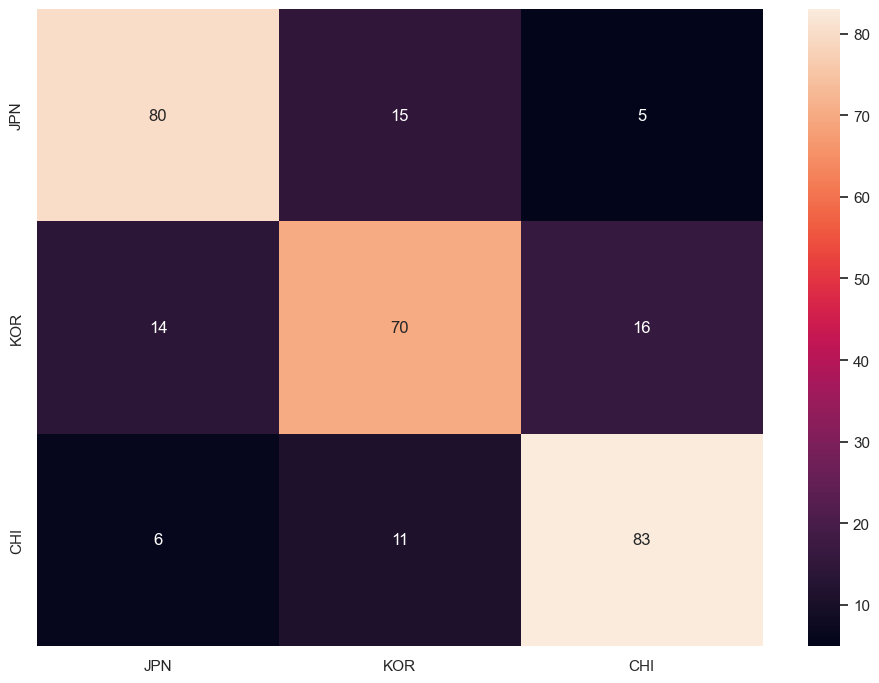

In [79]:
sns.heatmap(cf_df_asian, annot=True)